# CH7. 군집화(Clustering)
---
## 01. K-평균 알고리즘 이해
---
- **K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘이다. K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.**
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다. 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법이다.
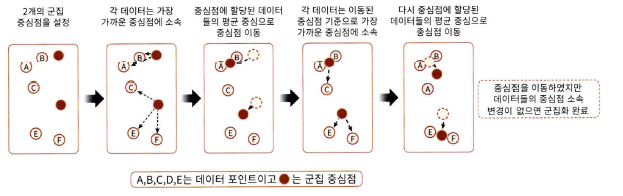
#### - K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결함
#### - K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 감소를 적용해야할 수도 있음)
- 반복을 수행하는데, 반복 회수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야할 지 가이드하기가 어려움         
=> **K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.** 


### 1) 사이킷런 KMeans 클래스
- 중요 파라미터
> - n_clusters: 군집화할 개수, 즉 군집 중심점의 개수를 의미
> - init: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함
> - max_iter: 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함
- KMeans 객체의 주요 속성 정보
> - labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
> - cluster_centers_: 각 군집 중심점 좌표. 이를 이용해 군집 중심점 좌표가 어디인지 시각화할 수 있음

### 2) K-평균을 이용한 붓꽃 데이터 세트 군집화
- 붓꽃의 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해보고, 이를 분류 값과 비교해보기

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- 붓꽃 데이터 세트를 3개의 그룹으로 군집화해보기

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

- iris의 각 데이터가 어떤 중심에 속하는지 알아보기: kmeans.labels_ 이용

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


-> 값이 0, 1, 2로 되어 있으며, 이는 각 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미함.

- 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인해보기
   - target과 cluster 값 개수 비교

In [6]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


-> 분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑됐다. Target 1값 데이터는 2개만 2번 군집으로 그루핑됐다. 하지만 Target 2값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑됐다. 

- 붓꽃 데이터 세트의 군집화 시각화해보기 
  - 붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합하지 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X좌표, Y좌표로 개별 데이터를 표현해보기

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


- pca_x는 X좌표 값, pca_y는 Y 좌표 값을 나타낸다. 각 군집별로 cluster 0은 마커 'o', cluster 1은 마커 's', cluster 2는 마커 '^'로 표현한다. 

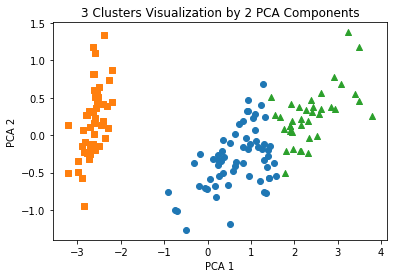

In [10]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF.cluster == 0].index
marker1_ind = irisDF[irisDF.cluster == 1].index
marker2_ind = irisDF[irisDF.cluster == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시 
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

-> Cluster 1을 나타내는 네모('s')는 명확히 다른 군집과 잘 분리돼있다. Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당 수준 분리돼 있지만, 네모만큼 명확하게는 분리돼 있지 않다. Cluster 0과  1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재한다.

## 02. 군집 평가(Cluster Evaluation)
---
- 대부분의 군집화 데이터 세트는 이렇게 비교할 만한 타깃 레이블을 가지고 있지 않다. 또한 군집화는 분류와 유사해 보일 수 있으나 성격이 많이 다르다. 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.
- 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용한다.
### 1) 실루엣 분석의 개요
- **군집화 평가 방법으로 실루엣 분석(silhouette analysis)이 있다. 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의미이다. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있다.**
- 실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 한다. **실루엣 계수는 개별 데이터가 가지는 군집화 지표이다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표이다.**
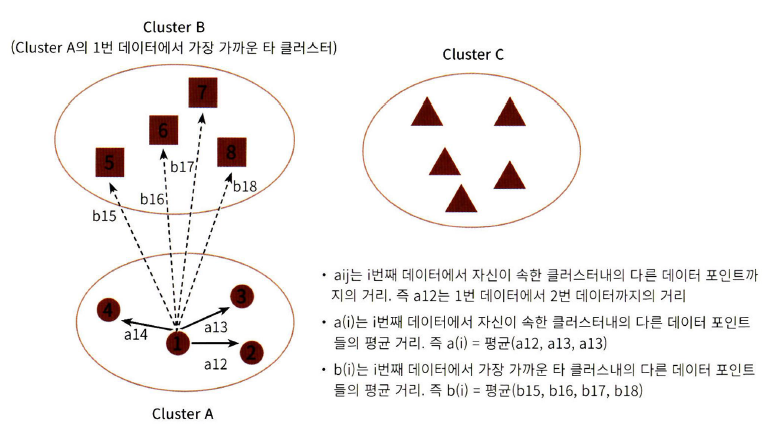
- 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산된다. 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이며 이 값을 정규화하기 위해 MAX(a(i), b(i)) 값으로 나눈다. **따라서 i번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같다.**
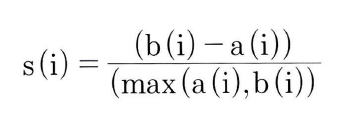
- 실루엣 계수는 -1에서 1 사이의 값을 가지며, **1로 가까우질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울수록 근처의 군집과 가까워진다는 것이다. -은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻한다.**
#### - 좋은 군집화가 되기 위한 조건
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 **silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.**             
2. 전체 실루엣 계수의 평균값과 더불어 **개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.** 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고, 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.



### 2) 붓꽃 데이터 세트를 이용한 군집 평가
- 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가해보기

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF.cluster)
print(score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF.cluster)
print(average_score)
irisDF.head(3)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(150,)
0.5528190123564095


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


-> 평균 실루엣 계수 값이 약 0.553이다. 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타낸다. 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다.

- 군집별 평균 실루엣 계수 값을 알아보기

In [13]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

-> 1번 군집은 실루엣 계수 평균 값이 약 0.8 인데 반해, 0번 군집은 약 0.42, 2번 군집은 약 0.45로 1번 군집에 비해 평균 실루엣 계수가 낮다는 것을 확인했다.

### 3) 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다. **개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-Means의 적절한 군집 개수가 설정됐다고 판단할 수 있다.** 

- 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수를 알아보기

In [15]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

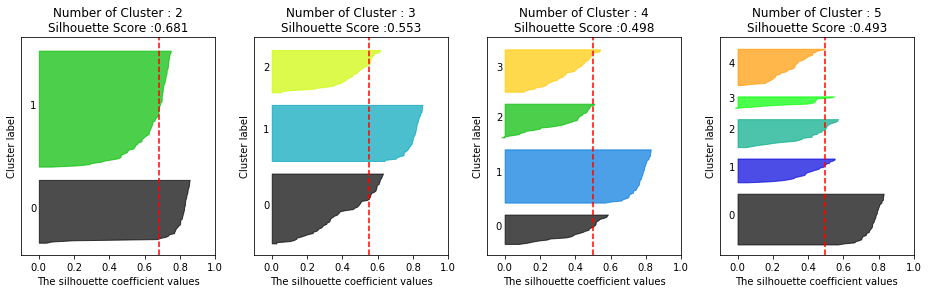

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

-> 붓꽃 데이터를 K-평균으로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아보인다. 3개의 경우 평균 실루엣 계수 값도 2개보다 작을 뿐더러 1번 군집과 0번, 2번 군집과의 실루엣 계수의 편차가 크다. 군집 4개, 5개의 경우도 마찬가지다.            

=> **실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 베이터와의 거리를 반복적으로 계산해야하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 특히 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우 메모리 부족등의 에러가 발생하기 쉽다. 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야한다.**

## 03. 평균 이동(Mean Shift)
---
### 1) 평균 이동의 개요 
- 평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 하지만 **K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.**
- **평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 데이터 포인트가 모여 있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수를 이용한다. 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점은 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용한다.**
- **평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.** 
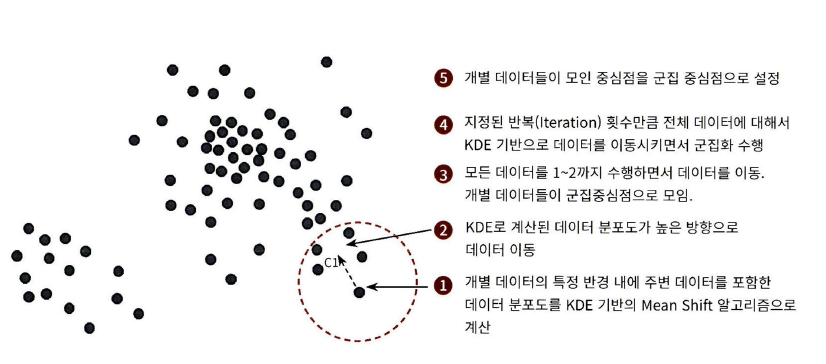
- KDE(Kernel Density Estimation)은 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 
- KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용된다. 다음 그림의 왼쪽은 개별 관측 데이터에 가우시안 커널 함수를 적용한 것이고, 오른쪽은 적용 값을 모두 더한 KDE 결과이다.
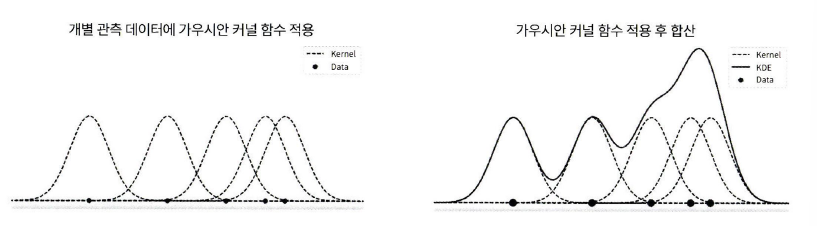
- KDE는 다음과 같은 커널 함수식으로 표현된다. 다음 식에서 K는 커널 함수, x는 확률 변수값, xi는 관측값, h는 대역폭(bandwidth)이다.
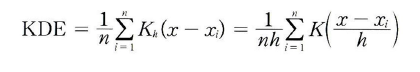
- **대역폭 h는 KDE 형태를 부드러운/뾰족한 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.** 다음 그림은 h 값을 증가시키면서 변화되는 KDE를 나타낸다. 작은 h값(h=0.1)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉽다. 반대로 매우 큰 h 값(h=10)은 과도하게 평활화(smooting)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉽다. **따라서 적절한 KDE의 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동(Mean Shift) 군집화에서 매우 중요하다.**
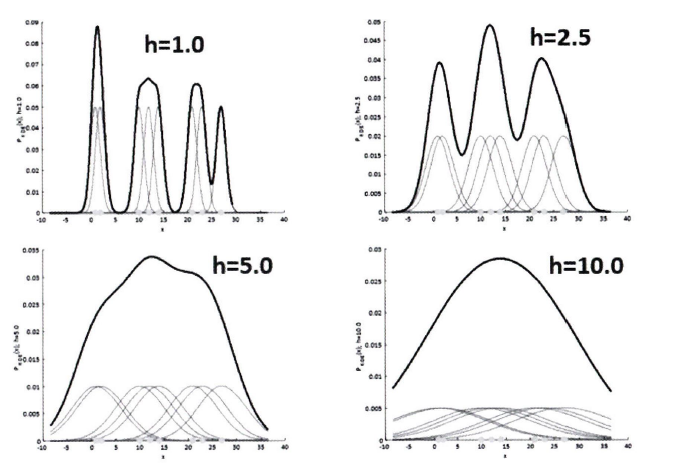
- **일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다. 또한 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다.**
- 사이킷런은 **평균 이동 군집화를 위해 MeanShift 클래스를 제공한다. 가장 중요한 초기화 파라미터는 bandwidth이며 이 파라미터가 KDE의 대역폭 h 이다. 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공한다.**
- **평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든다, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능한 것이다. 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없다. 하지만 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 bandwidth의 크기에 따른 군집화 영향도가 매우 크다.**

```
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))
```

## 04. GMM(Gaussian Mixture Model)
---
### 1) GMM 소개
- **GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)을 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다. 정규 분포(Normal distribution)로도 알려진 가우시안 분포는 좌우 대칭형의 종 형태를 가진 연속 확률 함수이다.**
- **GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주한다.** 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다. 
- **전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식이다. 데이터 세트의 데이터들이 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식이다.**
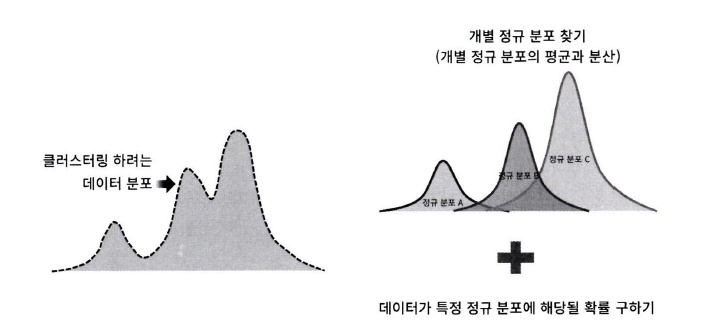
- 이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정하는 것이다.
  - 개별 정규 분포의 평균과 분산
  - 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용한다. 
  - EM(Expectation=Maximization) 알고리즘은 Latent 변수를 도입하여 최대 우도 추정량을 구하는 방법이다.

### 2) GMM을 이용한 붓꽃 데이터 세트 군집화
- **GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화이다.** 
- 붓꽃 데이터 세트로 이 두가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교해 보기.

In [17]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- **GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components이며, 이는 gaussian mixture의 모델의 총 개수이다.** K-평균의 n_clusters와 같이 군집의 개수를 정하는 데 중요한 역할을 수행한다.

- n_components를 3으로 설정하고 GMM로 군집화를 수행하기 &         
군집을 결정한 뒤 타깃별로 군집이 어떻게 매핑됐는지 확인해보기

In [18]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


-> Target 0은 cluster 0으로 Target 2는 cluster 1로 모두 잘 매핑됐다. Target 1만 cluster 2로 45개, cluster 1로 5개 매핑됐다. 앞 절의 K-평균 군집화 결과보다 더 효과적인 분류 결과가 도출됐다.                        
=> 이는 어떤 알고리즘이 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미이다. 
- **K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.** 

### 3) GMM과 K-평균의 비교
- **KMeans는 원형의 범위에서 군집화를 수행한다. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. 하지만 데이터가 길쭉한 타원형으로 늘어선 경우에는 군집화를 잘 수행하지 못한다.** KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 위와 같이 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어렵다. 
- **GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있다. 하지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다.**

## 05. DBSCAN(Density Based Spatial Clustering of Applications with Noise)
---
### 1) DBSCAN 개요
- **DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.** 
- **특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.**
- DBSCAN을 구성하는 가장 중요한 파라미터 
  - 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
  - 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수 
- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.
> - 핵심 포인트(core point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 칭함 
> - 이웃 포인트(neighbor point): 주변 영역 내에 위치한 타 데이터 
> - 경계 포인트(border point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
> - 잡음 포인트(noise point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터 

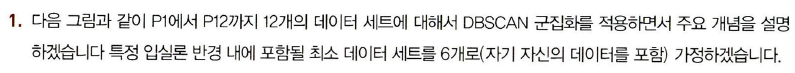
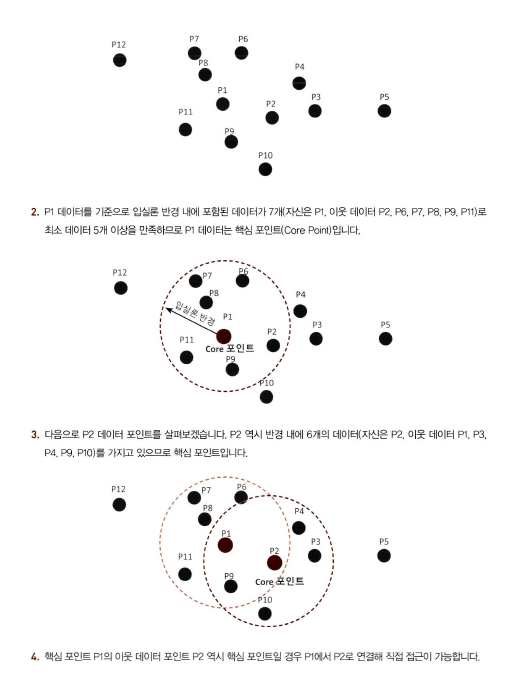
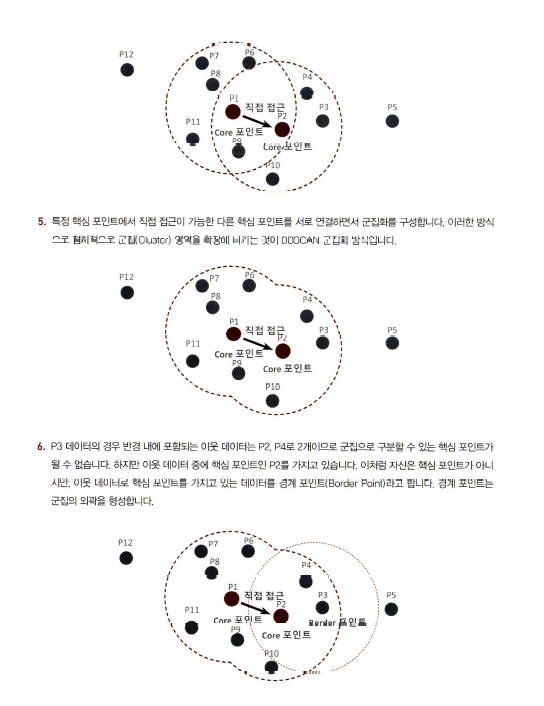
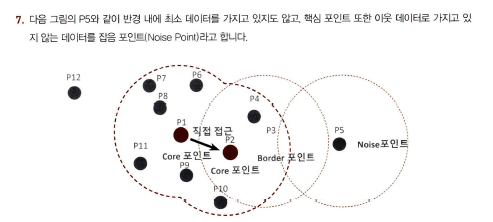
- **DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식이다.** 
- 사이킷런의 DBSCAN 클래스의 주요 초기화 파라미터
  - eps: 입실론 주변 영역의 반경
  - min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수(자신의 데이터를 포함. min points+1)


### 2) DBSCAN 적용하기 - 붓꽃 데이터 세트
- DBSCAN 클래스를 이용해 붓꽃 데이터 세트를 군집화하기
  - 일반적으로 eps 값으로는 1 이하의 값을 설정함

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


-> 0과 1에 특이하게 -1이 군집 레이블로 있다. 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미한다. 따라서 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두개의 군집으로 군집화됐다.         
-> Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아니다. DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다. 특히 붓꽃 데이터 세트는 군집을 3개로 하는 것보다는 2개로 하는 것이 군집화의 효율로서 더 좋은 면이 있다

- DBSCAN으로 군집화한 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 시각화해보기

In [22]:
# GMM에서 사용한 시각화 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

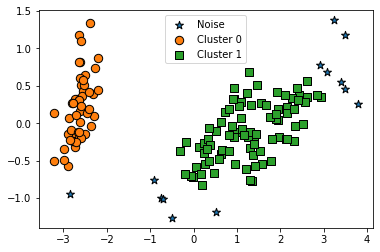

In [23]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

-> 별표로 표현된 값은 모두 노이즈이다. PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러난다. DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다. DBSCAN 알고리즘에 적잘한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는게 중요하다. 
- **일반적으로 eps 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다. min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다. 데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문이다.**

- eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어드는 것을 확인해보기

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


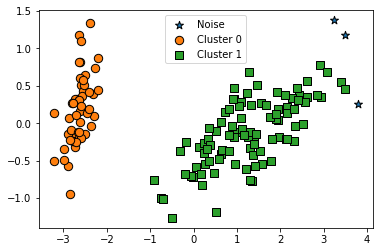

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

-> 노이즈 군집인 -1이 3개 밖에 없다. 기존에 eps가 0.6일 때 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 Cluster 1에 소속됐다. 

- eps를 기존 0.6으로 유지하고 min_samples를 16으로 늘려보기

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


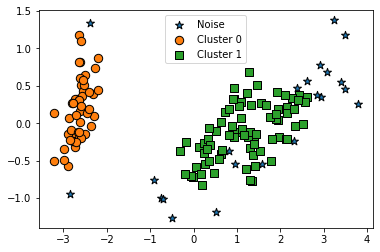

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

-> 노이즈 데이터가 기존보다 많이 증가함

### 3) DBSCAN 적용하기 - make_circles() 데이터 세트
- 이번에는 복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교해보겠다. 
- 먼저 make_circles() 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트를 만들어보기.
  - make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없다. 파라미터 noise는 노이즈 데이터 세트의 비율이며, factor은 외부 원과 내부 원의 scale 비율이다.

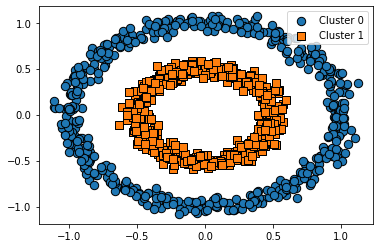

In [29]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- make_circles()는 내부 원과 외부 원으로 구분되는 데이터 세트를 생성한다.

- K-평균과 GMM은 어떻게 이 데이터 세트를 군집화하는지 확인해보기
- 먼저 K-평균으로 make_circles() 데이터 세트를 군집화해보기

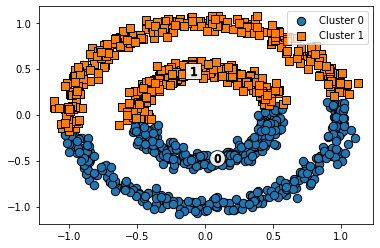

In [30]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

-> 위, 아래 군집 중심으르 기반으로 위와 아래 절반으로 군집화됐다. 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.

- GMM으로 적용해보기

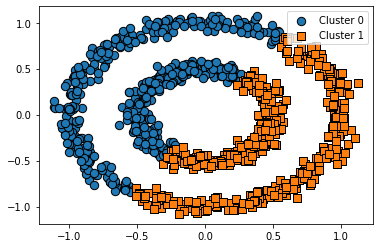

In [32]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

-> GMM도 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았다.

- DBSCAN으로 군집화 적용해보기

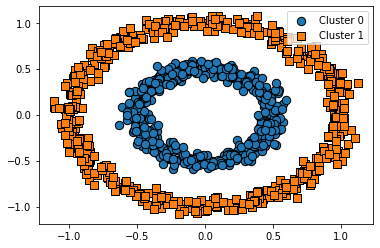

In [33]:
# DBSCAN으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

-> DBSCAN으로 군집화를 적용해 원화는 방향으로 정확히 군집화가 됐다.

## 07. 정리
---
- 각 군집화 기법은 나름의 장/단점을 가지고 있으며, 군집화하려는 데이터의 특성에 맞게 선택해야 한다. **K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행한다. 매우 쉽고 직관적인 알고리즘으로 많은 군집화 애플리케이션에서 애용되지만, 복잡한 구조를 가지는 데이터 세트에 적용하기에는 한계가 있으며, 군집의 개수를 최적화하기 어렵다. K-평균은 군집이 잘 되었는지의 평가를 위해 실루엣 계수를 이용한다.**
- **평균 이동(Mean Shift)은 K-평균과 유사하지만 거리 중심이 아니라 데이터가 모여 있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행한다. 일반 업무 기반의 정형 데이터 세트보다는 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행하는 알고리즘이다.**
- **GMM(Gaussian Mixture Model) 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 섞어서 생성된 모델로 가정해 수행하는 방식이다. 전체 데이터 세트에서 서로 다른 정규 분포 형태를 추출해 이렇게 다른 정규 분포를 가진 데이터 세트를 각각 군집화하는 것이다. GMM의 경우는 K-평균보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있는 장점과 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다.**
- **DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화**의 대표적인 알고리즘이다. DBSCAN은 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분하고 **특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성하는 방식이다. DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.**